In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus

[]

In [4]:
import cv2
import imghdr

C:\Users\Mega Pc\AppData\Local\Temp\ipykernel_11420\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 2430 files belonging to 2 classes.


In [11]:
#Scaling
data = data.map(lambda x,y: (x/255, y))

In [12]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [13]:
batch[0].max()

1.0

### Split

In [15]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [16]:
train_size

60

In [17]:
val_size

7

In [18]:
test_size

7

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D

In [20]:
model = Sequential()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Mega Pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training:

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.5443 - loss: 3.1467 - val_accuracy: 0.6562 - val_loss: 0.9505
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.6206 - loss: 0.9262 - val_accuracy: 0.6875 - val_loss: 0.7655
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.6314 - loss: 0.8113 - val_accuracy: 0.7054 - val_loss: 0.7420
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6294 - loss: 0.8063 - val_accuracy: 0.6607 - val_loss: 0.7584
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.6539 - loss: 0.7618 - val_accuracy: 0.7411 - val_loss: 0.6968
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6620 - loss: 0.7574 - val_accuracy: 0.7098 - val_loss: 0.7054
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.6792 - loss: 0.7296 - val_accuracy: 0.7054 - val_loss: 0.6945
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.6634 - loss: 0.7303 - val_accur

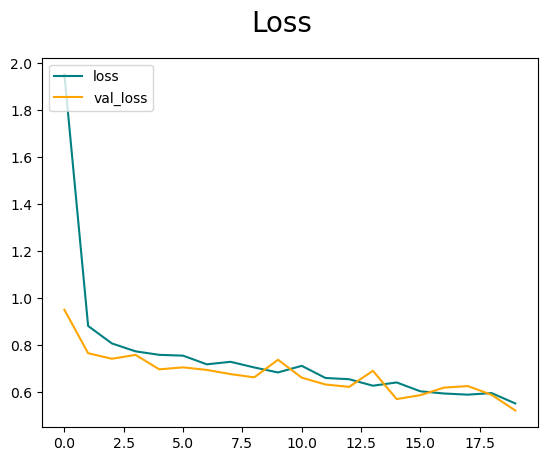

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

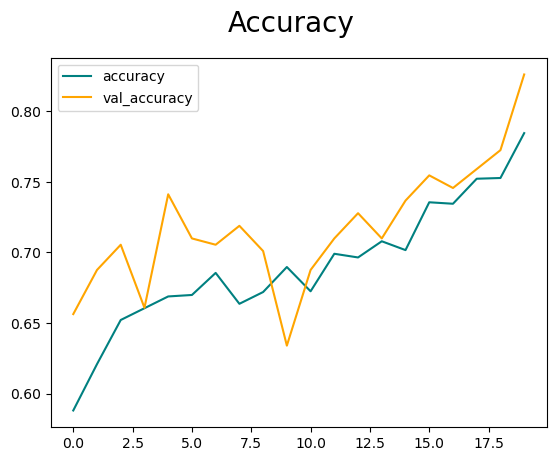

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [64]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.60784316, shape=(), dtype=float32) tf.Tensor(0.46969697, shape=(), dtype=float32) tf.Tensor(0.75446427, shape=(), dtype=float32)


Testing:

In [67]:
import cv2

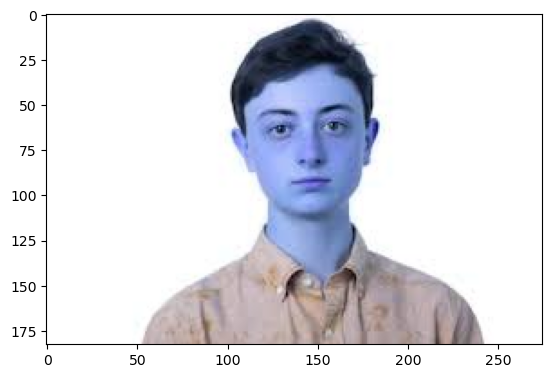

In [86]:
img=cv2.imread('download.jpg')
plt.imshow(img)
plt.show()

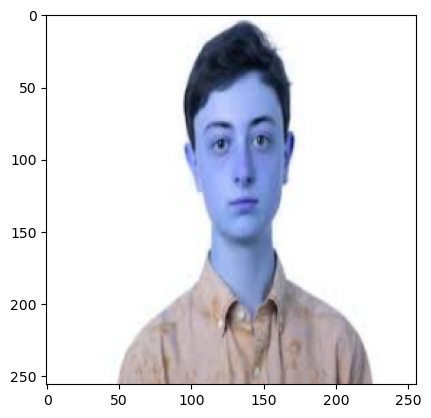

In [88]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [92]:
yhat

array([[0.67361915]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### Saving the model

In [84]:
model.save('imageclassifier.h5')